# Know about Data
For the task of news classification with machine learning, I have collected a [dataset from Kaggle](https://docs.google.com/spreadsheets/d/1fvhiqN7b6E3j697F_LzR9YpJmPTrlHPz/edit?usp=sharing&ouid=102571066663734139638&rtpof=true&sd=true), which contains news articles including their headlines and categories.

## Data Fields

*   Article Id – Article id unique given to the record
*   Article – Text of the header and article
*   Category – Category of the article (tech, business, sport, entertainment, politics)

In [1]:
# @title Installing Packages
!pip install pandas numpy matplotlib seaborn nltk wordcloud

In [2]:
# @title Importing Libraries
# @markdown let’s import the necessary Python libraries and the dataset that we need for this task.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
# @title Import Dataset and Shape it.
# @markdown Import the dataset which we will have to use. Check the shape (row and column) of the dataset.
dataset = pd.read_csv('BBC News Train.csv')
dataset.shape

(933, 3)

In [5]:
# @title Check Information of Columns of Dataset. Count Values of Categories.

dataset['Category'].value_counts()

sport            220
business         212
tech             172
politics         165
entertainment    163
Name: Category, dtype: int64

In [6]:
# @title Convert Categories Name into Numerical Index
# @markdown Associate Category names with numerical index and save it in new column CategoryId
target_category = dataset['Category'].unique()
print(target_category)

['business' 'tech' 'politics' 'sport' 'entertainment' nan]


In [7]:
dataset['CategoryId'] = dataset['Category'].factorize()[0]
dataset.head()

,ArticleId,Text,Category,CategoryId
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0
1,154,german business confidence slides german busin...,business,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,0
3,1976,lifestyle governs mobile choice faster bett...,tech,1
4,917,enron bosses in $168m payout eighteen former e...,business,0


In [8]:
# @title Show Category’s Name w.r.t Category ID
# @markdown Here you can show that news category’s name with respect to the following unique category ID.
# @markdown Create a new pandas dataframe "category", which only has unique Categories, also sorting this list in order of CategoryId values
category = dataset[['Category', 'CategoryId']].drop_duplicates().sort_values('CategoryId')
category

,Category,CategoryId
932,NaN,-1
0,business,0
3,tech,1
5,politics,2
6,sport,3
7,entertainment,4


## Exploratory Data Analysis (EDA)
In data mining, Exploratory Data Analysis (EDA) is an approach to analyzing datasets to summarize their main characteristics, often with visual methods. EDA is used for seeing what the data can tell us before the modeling task. It is not easy to look at a column of numbers or a whole spreadsheet and determine important characteristics of the data. It may be tedious, boring, and/or overwhelming to derive insights by looking at plain numbers. Exploratory data analysis techniques have been devised as an aid in this situation.

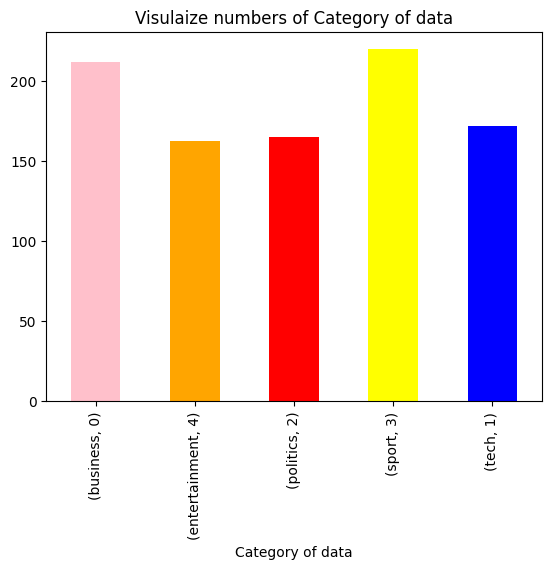

In [9]:
# @title Visualizing Data
# @markdown The below graph shows the news article count for category from our dataset.
dataset.groupby('Category').CategoryId.value_counts().plot(kind = "bar", color = ["pink", "orange", "red", "yellow", "blue"])
plt.xlabel("Category of data")
plt.title("Visulaize numbers of Category of data")
plt.show()

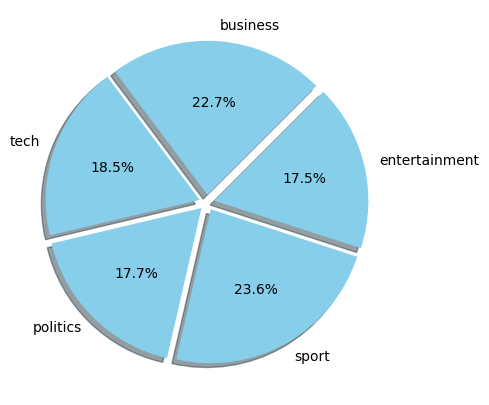

In [10]:
# @title Visualizing Category Related Words
fig = plt.figure(figsize = (5,5))
colors = ["skyblue"]
business = dataset[dataset['CategoryId'] == 0 ]
tech = dataset[dataset['CategoryId'] == 1 ]
politics = dataset[dataset['CategoryId'] == 2]
sport = dataset[dataset['CategoryId'] == 3]
entertainment = dataset[dataset['CategoryId'] == 4]
count = [business['CategoryId'].count(), tech['CategoryId'].count(), politics['CategoryId'].count(), sport['CategoryId'].count(), entertainment['CategoryId'].count()]
pie = plt.pie(count, labels = ['business', 'tech', 'politics', 'sport', 'entertainment'],
              autopct = "%1.1f%%",
              shadow = True,
              colors = colors,
              startangle = 45,
              explode = (0.05, 0.05, 0.05, 0.05,0.05))

business related words:


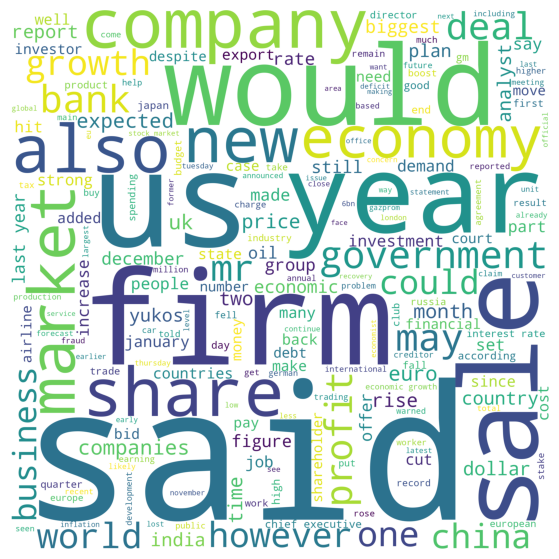

tech related words:


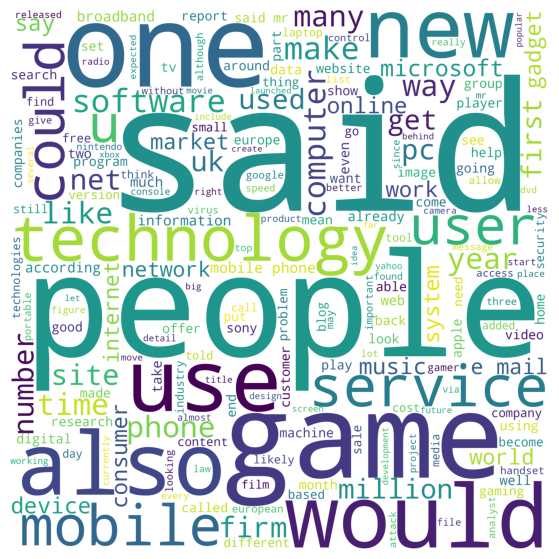

politics related words:


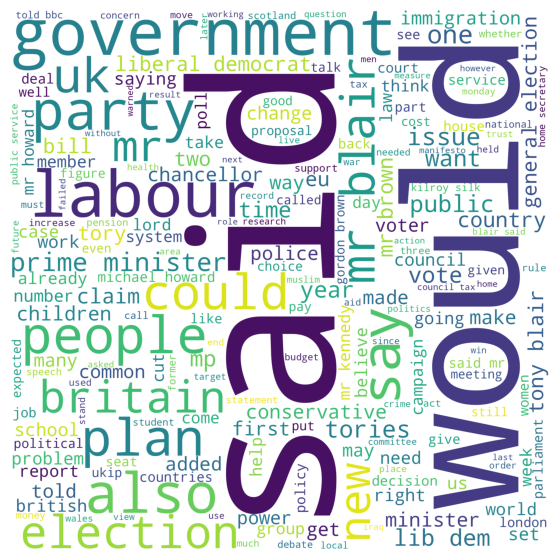

sport related words:


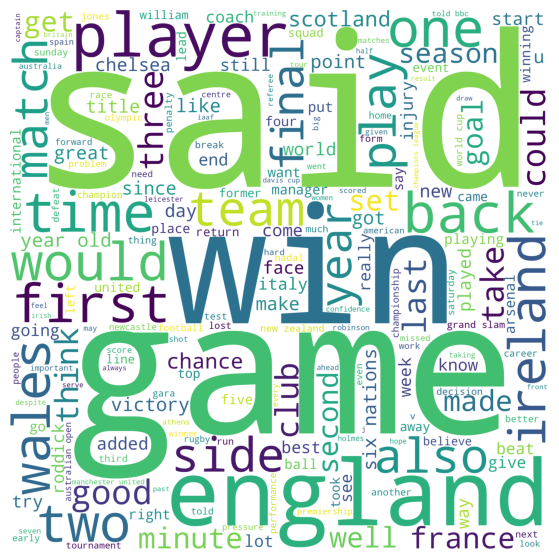

entertainment related words:


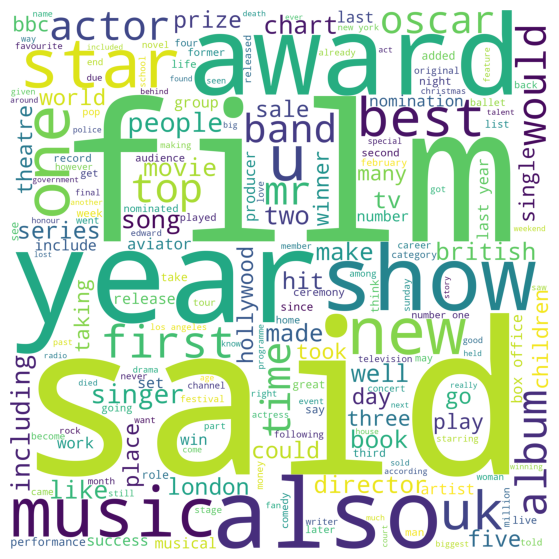

In [13]:
# @title Word Cloud
# @markdown Here we use the word cloud module to show the category-related words.
# @markdown Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data from social network websites.

from wordcloud import WordCloud

stop = set(stopwords.words('english'))

business = dataset[dataset['CategoryId'] == 0]
business = business['Text']

tech = dataset[dataset['CategoryId'] == 1]
tech = tech['Text']

politics = dataset[dataset['CategoryId'] == 2]
politics = politics['Text']

sport = dataset[dataset['CategoryId'] == 3]
sport = sport['Text']

entertainment = dataset[dataset['CategoryId'] == 4]
entertainment = entertainment['Text']

def wordcloud_draw(dataset, color = 'white'):
  words = ' '.join(dataset)
  cleaned_word = ' '.join([word for word in words.split()
  if (word != 'news' and word != 'text')])
  wordcloud = WordCloud(stopwords = stop,
    background_color = color,
    width = 2500, height = 2500).generate(cleaned_word)
  plt.figure(1, figsize = (10,7))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()

print("business related words:")
wordcloud_draw(business, 'white')

print("tech related words:")
wordcloud_draw(tech, 'white')

print("politics related words:")
wordcloud_draw(politics, 'white')

print("sport related words:")
wordcloud_draw(sport, 'white')

print("entertainment related words:")
wordcloud_draw(entertainment, 'white')

In [16]:
#@title Cleaning Text our Dataset
text = dataset["Text"]
category = dataset['Category']

# First, we remove all tags which are present in our given dataset.
def remove_tags(text):
  remove = re.compile(r'')
  return re.sub(remove, '', text)

dataset['Text'] = dataset['Text'].apply(remove_tags)

# Here we remove all the special characters.
def special_char(text):
  reviews = ''
  for x in text:
    if x.isalnum():
      reviews = reviews + x
    else:
      reviews = reviews + ' '
  return reviews
dataset['Text'] = dataset['Text'].apply(special_char)

# We convert all articles or text to lower case.
def convert_lower(text):
   return text.lower()
dataset['Text'] = dataset['Text'].apply(convert_lower)

# @markdown ## Remove all Stopwords.
# @markdown A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query. We would not want these words to take up space in our database, or take up the valuable processing time. For this, we can remove them easily, by storing a list of words that you consider to stop words. NLTK(Natural Language Toolkit) in python has a list of stopwords stored in 16 different languages.
def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))
  words = word_tokenize(text)
  return [x for x in words if x not in stop_words]
dataset['Text'] = dataset['Text'].apply(remove_stopwords)

# @markdown ##Lemmatizing the Words
# @markdown Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meanings to one word.  lemmatization is preferred over Stemming because lemmatization does morphological analysis of the words.
def lemmatize_word(text):
  wordnet = WordNetLemmatizer()
  return " ".join([wordnet.lemmatize(word) for word in text])
dataset['Text'] = dataset['Text'].apply(lemmatize_word)

dataset


,ArticleId,Text,Category,CategoryId
0,1833,worldcom ex bos launch defence lawyer defendin...,business,0
1,154,german business confidence slide german busine...,business,0
2,1101,bbc poll indicates economic gloom citizen majo...,business,0
3,1976,lifestyle governs mobile choice faster better ...,tech,1
4,917,enron bos 168m payout eighteen former enron di...,business,0
...,...,...,...,...
928,1710,assembly ballot paper missing hundred ballot p...,politics,2
929,488,wolf appoint hoddle manager glenn hoddle unvei...,sport,3
930,992,china shanda buy stake sina chinese online gam...,business,0
931,1024,radcliffe tackle marathon task paula radcliffe...,sport,3


In [17]:
# @title Declared Dependent and Independent Value

x = dataset['Text']
y = dataset['CategoryId']

In [18]:
# @title Create and Fit Bag of Words Model
# @markdown In this step, we construct a vector, which would tell us whether a word in each sentence is a frequent word or not. If a word in a sentence is a frequent word, we set it as 1, else we set it as 0.
# @markdown Whenever we apply any algorithm in NLP, it works on numbers. We cannot directly feed our text into that algorithm. Hence, the Bag of Words model is used to preprocess the text by converting it into a bag of words, which keeps a count of the total occurrences of the most frequently used words.

from sklearn.feature_extraction.text import CountVectorizer
x = np.array(dataset.iloc[:,0].values)
y = np.array(dataset.CategoryId.values)
cv = CountVectorizer(max_features = 5000)
x = cv.fit_transform(dataset.Text).toarray()
print("X.shape = ",x.shape)
print("y.shape = ",y.shape)

X.shape =  (933, 5000)
y.shape =  (933,)


In [19]:
# @title Train Test and Split the Dataset
# @markdown We need to split a dataset into train and test sets to evaluate how well our machine learning model performs. The train set is used to fit the model, the statistics of the train set are known. The second set is called the test data set, this set is solely used for predictions.

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)
print(len(x_train))
print(len(x_test))

653
280


In [20]:
#create list of model and accuracy dicts
perform_list = [ ]

In [21]:
# @title Create, Fit and Predict all ML Models
def run_model(model_name, est_c, est_pnlty):
  mdl=''
  if model_name == 'Logistic Regression':
    mdl = LogisticRegression()
  elif model_name == 'Random Forest':
    mdl = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0)
  elif model_name == 'Multinomial Naive Bayes':
    mdl = MultinomialNB(alpha=1.0,fit_prior=True)
  elif model_name == 'Support Vector Classifer':
    mdl = SVC()
  elif model_name == 'Decision Tree Classifier':
    mdl = DecisionTreeClassifier()
  elif model_name == 'K Nearest Neighbour':
    mdl = KNeighborsClassifier(n_neighbors=10 , metric= 'minkowski' , p = 4)
  elif model_name == 'Gaussian Naive Bayes':
    mdl = GaussianNB()

  oneVsRest = OneVsRestClassifier(mdl)
  oneVsRest.fit(x_train, y_train)
  y_pred = oneVsRest.predict(x_test)
  # Performance metrics
  accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
  # Get precision, recall, f1 scores
  precision, recall, f1score, support = score(y_test, y_pred, average='micro')
  print(f'Test Accuracy Score of Basic {model_name}: % {accuracy}')
  print(f'Precision : {precision}')
  print(f'Recall : {recall}')
  print(f'F1-score : {f1score}')
  # Add performance parameters to list
  perform_list.append(dict([
    ('Model', model_name),
    ('Test Accuracy', round(accuracy, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2))
    ]))

In [22]:
# @title Logistic Regression
run_model('Logistic Regression', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Logistic Regression: % 92.86
Precision : 0.9285714285714286
Recall : 0.9285714285714286
F1-score : 0.9285714285714286


In [23]:
# @title Random Forest
run_model('Random Forest', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Random Forest: % 93.21
Precision : 0.9321428571428572
Recall : 0.9321428571428572
F1-score : 0.9321428571428572


In [24]:
# @title Multinomial Naive Bayes
run_model('Multinomial Naive Bayes', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Multinomial Naive Bayes: % 94.64
Precision : 0.9464285714285714
Recall : 0.9464285714285714
F1-score : 0.9464285714285714


In [25]:
# @title Support Vector Machine
run_model('Support Vector Classifer', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Support Vector Classifer: % 91.07
Precision : 0.9107142857142857
Recall : 0.9107142857142857
F1-score : 0.9107142857142857


In [26]:
# @title Decision Tree
run_model('Decision Tree Classifier', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Decision Tree Classifier: % 72.5
Precision : 0.725
Recall : 0.725
F1-score : 0.7250000000000001


In [29]:
# @title KNN (K Nearest Neighbour)
run_model('K Nearest Neighbour', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic K Nearest Neighbour: % 66.43
Precision : 0.6642857142857143
Recall : 0.6642857142857143
F1-score : 0.6642857142857143


In [30]:
# @title Gaussian Naive Bayes
run_model('Gaussian Naive Bayes', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Gaussian Naive Bayes: % 70.36
Precision : 0.7035714285714286
Recall : 0.7035714285714286
F1-score : 0.7035714285714286


In [31]:
# @title Create Dataframe of Model, Accuracy, Precision, Recall, and F1
model_performance = pd.DataFrame(data=perform_list)
model_performance = model_performance[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
model_performance

,Model,Test Accuracy,Precision,Recall,F1
0,Logistic Regression,92.86,0.93,0.93,0.93
1,Random Forest,93.21,0.93,0.93,0.93
2,Multinomial Naive Bayes,94.64,0.95,0.95,0.95
3,Support Vector Classifer,91.07,0.91,0.91,0.91
4,Decision Tree Classifier,72.50,0.72,0.72,0.73
5,K Nearest Neighbour,66.43,0.66,0.66,0.66
6,Gaussian Naive Bayes,70.36,0.70,0.70,0.70


In [32]:
# @title Best Model to Perform Accuracy Score
# @markdown Here, after training and testing the model we find that Random Forest Classifier model has given the best accuracy from all machine learning models.

model = model_performance["Model"]
max_value = model_performance["Test Accuracy"].max()
print("The best accuracy of model is", max_value,"from Random")

The best accuracy of model is 94.64 from Random


In [33]:
# @title Fit & predict best ML Model
# @markdown Here we fit and predict our best model i.e. Random Forest.
classifier = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0).fit(x_train, y_train)
classifier
y_pred = classifier.predict(x_test)

In [34]:
# @title Predict News Article
y_pred1 = cv.transform(['Hour ago, I contemplated retirement for a lot of reasons. I felt like people were not sensitive enough to my injuries. I felt like a lot of people were backed, why not me? I have done no less. I have won a lot of games for the team, and I am not feeling backed, said Ashwin'])
yy = classifier.predict(y_pred1)
result = ""
if yy == [0]:
  result = "Business News"
elif yy == [1]:
  result = "Tech News"
elif yy == [2]:
  result = "Politics News"
elif yy == [3]:
  result = "Sports News"
elif yy == [1]:
  result = "Entertainment News"
print(result)

Sports News


# Conclusion
Finally after doing Data cleaning and Data Preprocessing (cleaning data, train_test_split model, creating a bag of words NLP model, and machine learning model) we got the accuracy scores and we can say that Random Forest Classification gives the best accuracy among all machine learning models.

And at last, we also predict the category of different news articles.